In [5]:
import pandas as pd
covid_data = pd.read_csv('data/covid_data.csv')
display(covid_data.head())


vaccinations_data = pd.read_csv('data/country_vaccinations.csv')
vaccinations_data = vaccinations_data[
    ['country', 'date', 'total_vaccinations', 
     'people_vaccinated', 'people_vaccinated_per_hundred',
     'people_fully_vaccinated', 'people_fully_vaccinated_per_hundred',
     'daily_vaccinations', 'vaccines']
]

display(vaccinations_data.head())

,date,province/state,country,confirmed,deaths,recovered
0,01/22/2020,Anhui,China,1.0,0.0,0.0
1,01/22/2020,Beijing,China,14.0,0.0,0.0
2,01/22/2020,Chongqing,China,6.0,0.0,0.0
3,01/22/2020,Fujian,China,1.0,0.0,0.0
4,01/22/2020,Gansu,China,0.0,0.0,0.0


,country,date,total_vaccinations,people_vaccinated,people_vaccinated_per_hundred,people_fully_vaccinated,people_fully_vaccinated_per_hundred,daily_vaccinations,vaccines
0,Afghanistan,2021-02-22,0.0,0.0,0.0,NaN,NaN,NaN,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi..."
1,Afghanistan,2021-02-23,NaN,NaN,NaN,NaN,NaN,1367.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi..."
2,Afghanistan,2021-02-24,NaN,NaN,NaN,NaN,NaN,1367.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi..."
3,Afghanistan,2021-02-25,NaN,NaN,NaN,NaN,NaN,1367.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi..."
4,Afghanistan,2021-02-26,NaN,NaN,NaN,NaN,NaN,1367.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi..."


In [ ]:
# # В таблице covid_data данные о заболеваемости представлены для каждого региона (штата) страны за каждый день. Например, для США (United States) записи за 29 мая 2021 года имеют вид:
# В таблице vaccinations_data параметры вакцинирования отображены для всех стран на каждый день, без учёта регионов. Вот часть таблицы для тех же Соединённых Штатов за 29 мая 2021 года. 
# 
# В данных много пропусков, а также неверно введённых значений. Например, для США (United States) и Великобритании (United Kingdom) в большинстве записей таблицы covid_data число выздоровевших людей равно 0. В данном модуле мы закроем на это глаза, но вообще эти страны подлежали бы исключению из данных или нам понадобился бы дополнительный источник данных, из которого мы смогли бы получить недостающую информацию.
# 
# Обратите внимание, что признаки confirmed, deaths, recovered, total_vaccination, people_vaccinated, people_fully_vaccinated — это суммарные показатели по стране, то есть с каждым днём они должны расти. Такие признаки называют накопительными.
# Возникает большое желание объединить таблицы. Для этого необходимо учитывать следующие нюансы:
# 
# 1
# В таблице covid_data необходимо предварительно рассчитать суммарное ежедневное число заболевших во всех провинциях/штатах в каждой стране.
# 
# 2
# В таблицах не совпадает число стран, а иногда и их названия. 
# 
# При объединении таблиц по столбцу мы определённо теряем данные (в данной задаче потери незначительны). Избежать этого можно ручными преобразованиями данных — искать различия в названиях стран в таблицах и преобразовывать их. Однако это не является темой данного модуля.
# 
# 3
# Таблицы имеют разные периоды наблюдений (вакцины появились позже, чем сам вирус). Объединив данные с типом inner, мы можем потерять большое количество наблюдений в таблице covid_data.

In [13]:
#Группируем таблицу по дате и названию страны и рассчитываем суммарные показатели по всем регионам. Тем самым переходим от данных по регионам к данным по странам:
covid_data = covid_data.groupby(
    ['date', 'country'], 
    as_index=False
)[['confirmed', 'deaths', 'recovered']].sum()

# Преобразуем даты в формат datetime с помощью функции pd.to_datetime():
covid_data['date'] = pd.to_datetime(covid_data['date'])

#Создадим признак больных на данный момент (active). Для этого вычтем из общего числа зафиксированных случаев число смертей и число выздоровевших пациентов:
covid_data['active'] = covid_data['confirmed'] - covid_data['deaths'] - covid_data['recovered']

# Создадим признак ежедневного прироста числа заболевших, умерших и выздоровевших людей. Для этого отсортируем данные по названиям стран, а затем по датам. После этого произведём группировку по странам и рассчитаем разницу между «вчера и сегодня» с помощью метода diff():

covid_data = covid_data.sort_values(by=['country', 'date'])
covid_data['daily_confirmed'] = covid_data.groupby('country')['confirmed'].diff()
covid_data['daily_deaths'] = covid_data.groupby('country')['deaths'].diff()
covid_data['daily_recovered'] = covid_data.groupby('country')['recovered'].diff()
display(covid_data.head())
covid_data.info()


#В таблице vaccinations_data достаточно будет преобразовать столбцы в формат datetime:

vaccinations_data['date'] = pd.to_datetime(vaccinations_data['date'])
display(vaccinations_data.head())
vaccinations_data.info()

,date,country,confirmed,deaths,recovered,active,daily_confirmed,daily_deaths,daily_recovered
881,2020-02-24,Afghanistan,1.0,0.0,0.0,1.0,NaN,NaN,NaN
920,2020-02-25,Afghanistan,1.0,0.0,0.0,1.0,0.0,0.0,0.0
963,2020-02-26,Afghanistan,1.0,0.0,0.0,1.0,0.0,0.0,0.0
1013,2020-02-27,Afghanistan,1.0,0.0,0.0,1.0,0.0,0.0,0.0
1067,2020-02-28,Afghanistan,1.0,0.0,0.0,1.0,0.0,0.0,0.0


<class 'pandas.core.frame.DataFrame'>
Index: 86785 entries, 881 to 3115
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   date             86785 non-null  datetime64[ns]
 1   country          86785 non-null  object        
 2   confirmed        86785 non-null  float64       
 3   deaths           86785 non-null  float64       
 4   recovered        86785 non-null  float64       
 5   active           86785 non-null  float64       
 6   daily_confirmed  86564 non-null  float64       
 7   daily_deaths     86564 non-null  float64       
 8   daily_recovered  86564 non-null  float64       
dtypes: datetime64[ns](1), float64(7), object(1)
memory usage: 6.6+ MB


,country,date,total_vaccinations,people_vaccinated,people_vaccinated_per_hundred,people_fully_vaccinated,people_fully_vaccinated_per_hundred,daily_vaccinations,vaccines
0,Afghanistan,2021-02-22,0.0,0.0,0.0,NaN,NaN,NaN,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi..."
1,Afghanistan,2021-02-23,NaN,NaN,NaN,NaN,NaN,1367.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi..."
2,Afghanistan,2021-02-24,NaN,NaN,NaN,NaN,NaN,1367.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi..."
3,Afghanistan,2021-02-25,NaN,NaN,NaN,NaN,NaN,1367.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi..."
4,Afghanistan,2021-02-26,NaN,NaN,NaN,NaN,NaN,1367.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi..."


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42795 entries, 0 to 42794
Data columns (total 9 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   country                              42795 non-null  object        
 1   date                                 42795 non-null  datetime64[ns]
 2   total_vaccinations                   23457 non-null  float64       
 3   people_vaccinated                    22371 non-null  float64       
 4   people_vaccinated_per_hundred        22371 non-null  float64       
 5   people_fully_vaccinated              19462 non-null  float64       
 6   people_fully_vaccinated_per_hundred  19462 non-null  float64       
 7   daily_vaccinations                   42558 non-null  float64       
 8   vaccines                             42795 non-null  object        
dtypes: datetime64[ns](1), float64(6), object(2)
memory usage: 2.9+ MB


In [27]:
# Проверим структуру данных
print("COVID Data Columns:", covid_data.columns.tolist())
print("Vaccinations Data Columns:", vaccinations_data.columns.tolist())

# Унификация названий стран и дат
def clean_country_names(df):
    df['country'] = df['country'].str.strip().str.title()
    return df

covid_data = clean_country_names(covid_data)
vaccinations_data = clean_country_names(vaccinations_data)

# Проверка пересечения дат
covid_min_date = covid_data['date'].min()
covid_max_date = covid_data['date'].max()
vaccine_min_date = vaccinations_data['date'].min()
vaccine_max_date = vaccinations_data['date'].max()

print(f"\nCOVID data range: {covid_min_date} to {covid_max_date}")
print(f"Vaccine data range: {vaccine_min_date} to {vaccine_max_date}")

# Основное объединение
merged_data = pd.merge(
    covid_data,
    vaccinations_data.drop(columns=['country']),  # Убираем дублирующую колонку
    on='date',
    how='left',
    suffixes=('_covid', '_vaccine')
)

# Постобработка
vaccine_columns = ['total_vaccinations', 'people_vaccinated', 
                  'people_fully_vaccinated', 'daily_vaccinations']
merged_data[vaccine_columns] = merged_data[vaccine_columns].fillna(0)

merged_data.info()


COVID Data Columns: ['date', 'country', 'confirmed', 'deaths', 'recovered', 'active', 'daily_confirmed', 'daily_deaths', 'daily_recovered']
Vaccinations Data Columns: ['country', 'date', 'total_vaccinations', 'people_vaccinated', 'people_vaccinated_per_hundred', 'people_fully_vaccinated', 'people_fully_vaccinated_per_hundred', 'daily_vaccinations', 'vaccines']

COVID data range: 2020-01-22 00:00:00 to 2021-05-29 00:00:00
Vaccine data range: 2020-12-02 00:00:00 to 2021-09-06 00:00:00
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4337147 entries, 0 to 4337146
Data columns (total 16 columns):
 #   Column                               Dtype         
---  ------                               -----         
 0   date                                 datetime64[ns]
 1   country                              object        
 2   confirmed                            float64       
 3   deaths                               float64       
 4   recovered                            float64       


In [29]:
# Фильтруем vaccinations_data по пересечению дат с covid_data
filtered_vaccinations = vaccinations_data[
    (vaccinations_data['date'] >= '2020-12-02') & 
    (vaccinations_data['date'] <= '2021-05-29')
]

# Выполняем объединение
covid_df = pd.merge(
    covid_data,
    filtered_vaccinations,
    on=['date', 'country'],
    how='left'
)

# Проверка результата
print(f"Диапазон дат в объединённой таблице: {covid_df['date'].min()} - {covid_df['date'].max()}")
print(f"Общее количество записей: {len(covid_df)}")
print(f"Записи с данными о вакцинации: {covid_df['total_vaccinations'].notna().sum()}")

Диапазон дат в объединённой таблице: 2020-01-22 00:00:00 - 2021-05-29 00:00:00
Общее количество записей: 86785
Записи с данными о вакцинации: 10629


In [38]:
pivot = pd.pivot_table(
    data = covid_df[covid_df.country == 'United States'],
    index='country',  # Группируем по стране
    values='deaths',  # Используем столбец 'date' для подсчета
    aggfunc='count'  # Подсчитываем количество строк для каждого года
)

# 4. Находим год с максимальным количеством оценок
most_rated_deaths = pivot.deaths  # Год с максимумом


display(most_rated_deaths)


country
United States    494
Name: deaths, dtype: int64

In [41]:
#Какова максимальная летальность в США (United States) за весь период? Ответ округлите до второго знака после запятой.
# Фильтруем данные по США
usa_data = covid_df[covid_df['country'] == 'United States']

# Рассчитываем дневную летальность
usa_data['daily_cfr'] = (usa_data['deaths'] / usa_data['confirmed']) * 100

# Находим максимальное значение
max_cfr = usa_data['daily_cfr'].max().round(2)
print(f"Максимальная дневная летальность в США: {max_cfr}%")

Максимальная дневная летальность в США: 7.19%


C:\Users\Yoga\AppData\Local\Temp\ipykernel_10896\1678008214.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  usa_data['daily_cfr'] = (usa_data['deaths'] / usa_data['confirmed']) * 100


In [42]:
#Чему равен средний процент выздоровевших в России (Russia)? Ответ округлите до второго знака после запятой.

# Фильтруем данные по России
russia_data = covid_df[covid_df['country'] == 'Russia']

# Удаляем строки с нулевыми подтверждёнными случаями
russia_clean = russia_data[russia_data['confirmed'] > 0]

# Рассчитываем дневной процент выздоровевших
russia_clean['recovery_rate'] = (russia_clean['recovered'] / russia_clean['confirmed']) * 100

# Вычисляем среднее значение
avg_recovery = russia_clean['recovery_rate'].mean().round(2)
print(f"Средний процент выздоровевших в России: {avg_recovery}%")

Средний процент выздоровевших в России: 67.06%


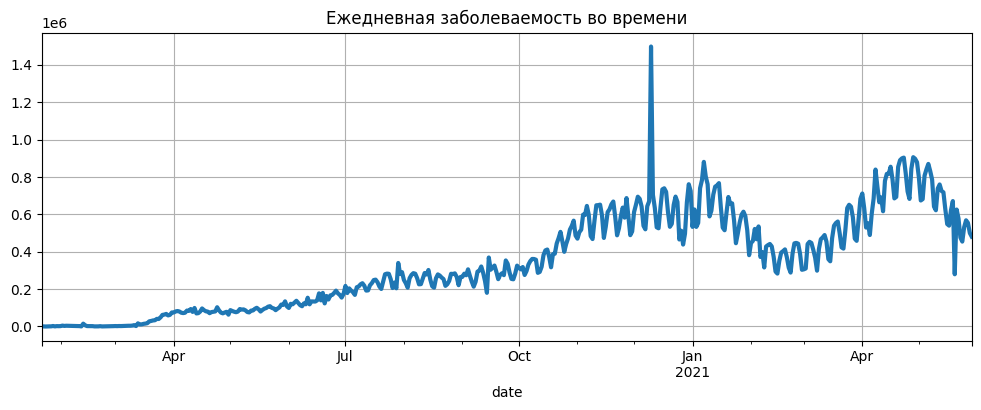

In [43]:
# Начнём с исследования заболеваемости коронавирусом во всём мире. Для этого первым делом отобразим, как менялось ежедневное число заболевших (daily_confirmed) во всём мире во времени. Далее сгруппируем таблицу по датам и подсчитаем суммарное число зафиксированных случаев по дням.
# 
# Теперь мы наконец можем построить график с помощью метода plot(). Будем использовать линейный график размером 12x4 (попробуйте взять другие числа, чтобы увидеть разницу). Подпишем график и отобразим сетку. Параметр lw (line width) отвечает за ширину линии для линейного графика.

grouped_cases = covid_df.groupby('date')['daily_confirmed'].sum()
grouped_cases.plot(
    kind='line',
    figsize=(12, 4),
    title='Ежедневная заболеваемость во времени',
    grid = True,
    lw=3
);

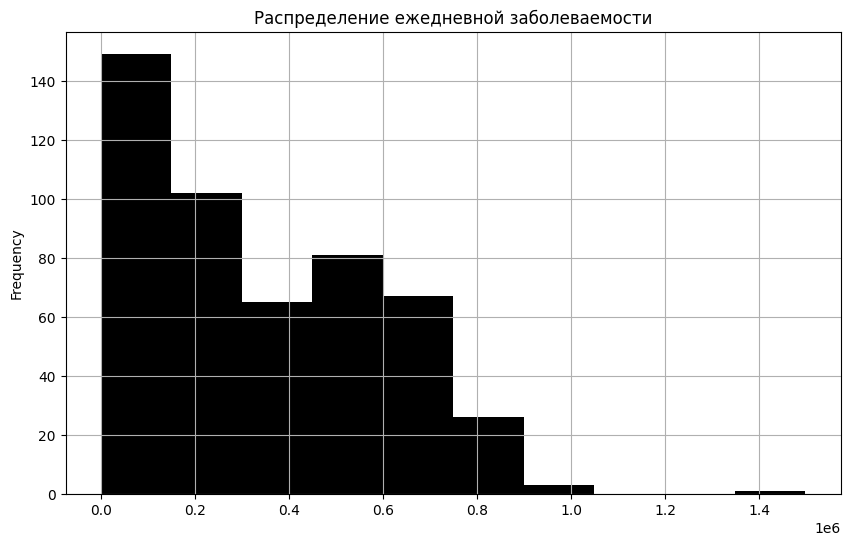

In [44]:
# Теперь построим гистограмму, которая покажет распределение ежедневной заболеваемости во всём мире. Для этого параметр kind выставляем на значение 'hist'. Параметр bins (корзины) отвечает за число прямоугольников в гистограмме — пусть их будет 10 (попробуйте использовать другие числа, чтобы увидеть разницу).

grouped_cases.plot(
    kind='hist',
    figsize=(10, 6),
    title='Распределение ежедневной заболеваемости',
    grid = True,
    color = 'black',
    bins=10
);

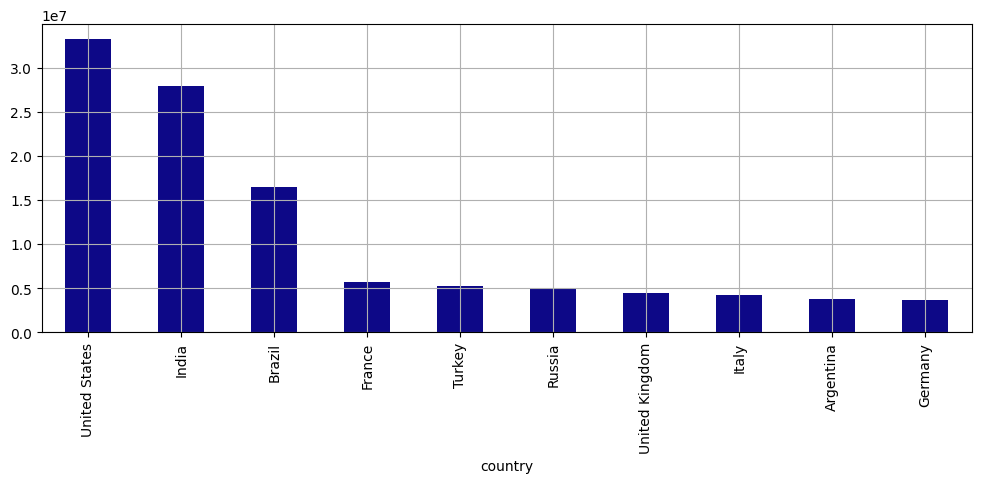

In [45]:
# Давайте построим столбчатую диаграмму, которая покажет ТОП-10 стран по суммарной заболеваемости.
# Для этого сгруппируем данные по странам и вычислим последний зафиксированный показатель с помощью агрегирующего метода last() — он возвращает последнее значение в столбце DataFrame.
# Для построения столбчатой диаграммы значение параметра kind выставляем на 'bar'. Параметр colormap отвечает за цветовую гамму графика.

grouped_country = covid_df.groupby(['country'])['confirmed'].last()
grouped_country = grouped_country.nlargest(10)
grouped_country.plot(
    kind='bar',
    grid=True,
    figsize=(12, 4),
    colormap='plasma'
);

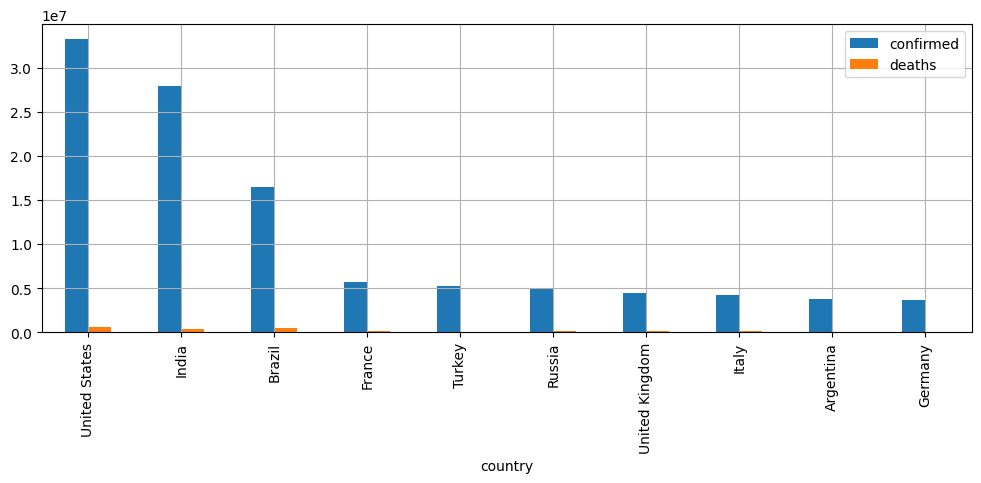

In [46]:
#А теперь посмотрим, как в этих десяти странах соотносится количество заболевших и умерших от вируса. Для этого отобразим сразу два показателя на столбчатой диаграмме: 

grouped_country = covid_df.groupby(['country'])[['confirmed', 'deaths']].last()
grouped_country = grouped_country.nlargest(10, columns=['confirmed'])
grouped_country.plot(     kind='bar',     grid=True,     figsize=(12, 4), );

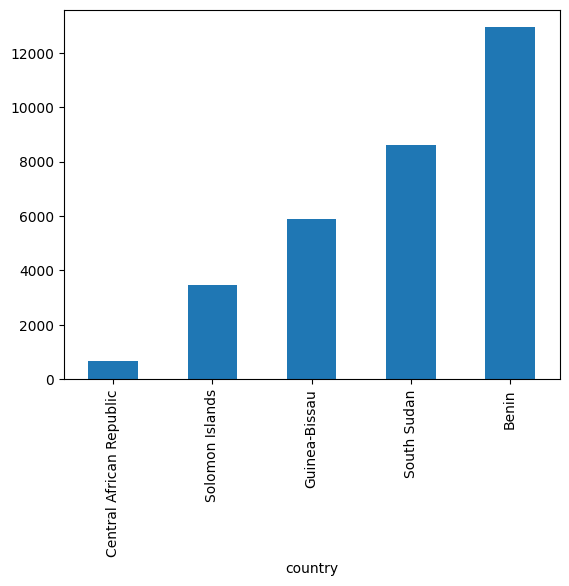

In [47]:
covid_df.groupby(['country'])['total_vaccinations'].last().nsmallest(5).plot(kind='bar');

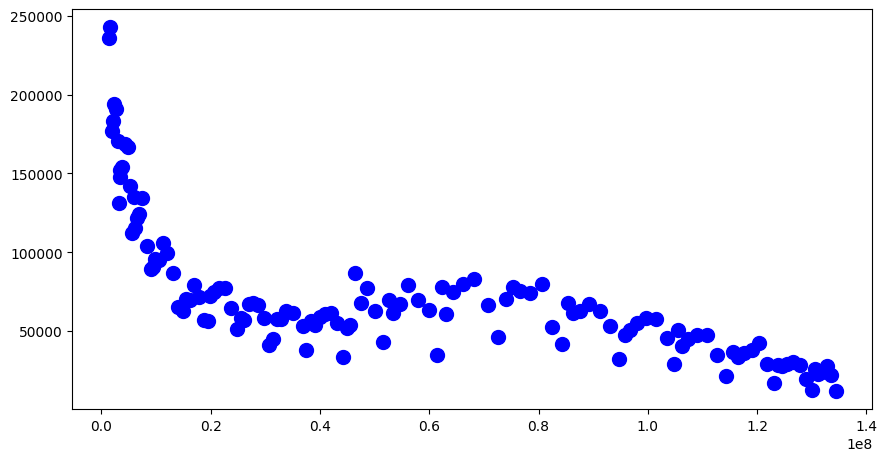

In [48]:
#На диаграмме рассеяния по оси абсцисс откладываем суммарное число поставленных вакцин, а по оси ординат — ежедневный прирост заболевших:
us_data = covid_df[covid_df['country'] == 'United States']

fig = plt.figure(figsize=(8, 4))
axes = fig.add_axes([0, 0, 1, 1])
axes.scatter(
    x=us_data['people_fully_vaccinated'], 
    y=us_data['daily_confirmed'], 
    s=100,
    marker='o',
    c = 'blue'
);

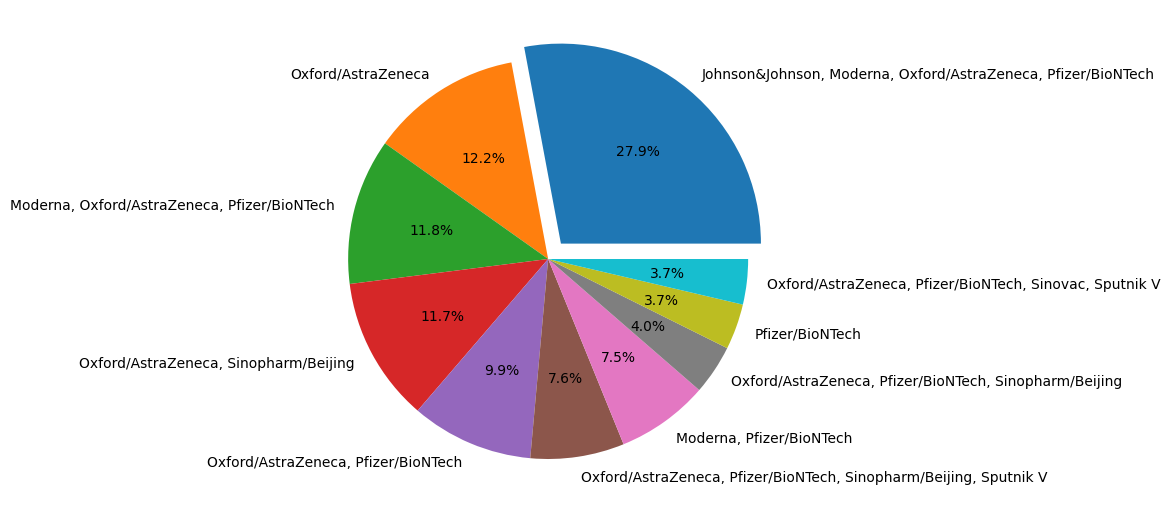

In [53]:
# ТОП-10 комбинаций вакцин (vaccines) по распространённости мы находим с помощью метода value_counts(). Круговую диаграмму строим на полученных значениях, метки для каждого значения — индексы промежуточной таблицы. Будем отображать доли в процентах и округлять их до одного знака после запятой. Самую распространённую вакцину сместим на 10 % от центра:

vaccine_combinations = covid_df['vaccines'].value_counts()[:10]
fig = plt.figure(figsize=(5, 5))
axes = fig.add_axes([0, 0, 1, 1])
axes.pie(
    vaccine_combinations,
    labels=vaccine_combinations.index,
    autopct='%.1f%%',
    explode = [0.1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
);

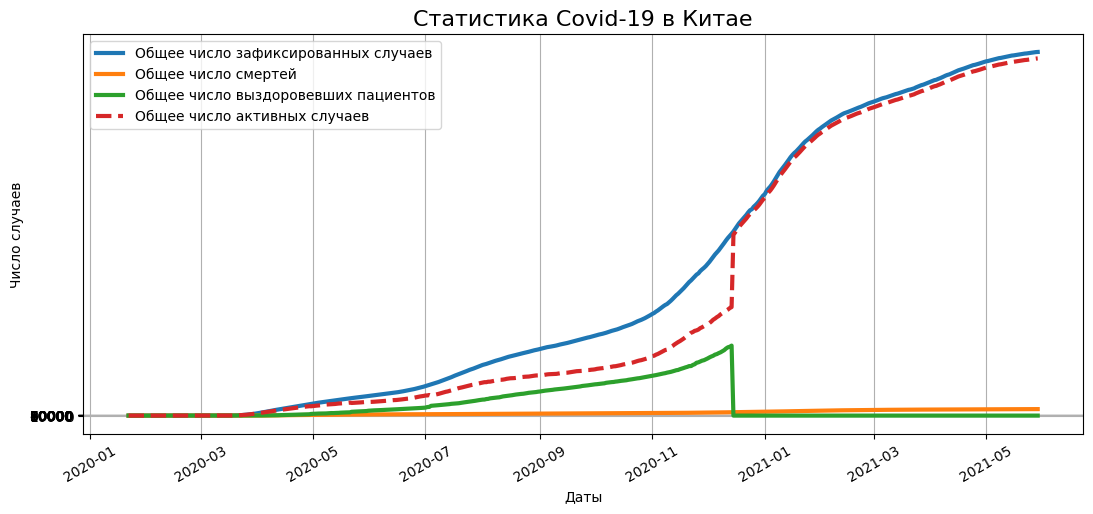

In [57]:
# Например, изобразим на одном графике, как росла общая заболеваемость (confirmed), число зафиксированных смертей (deaths), выздоровевших пациентов (recovered) и активных случаев (active) в Китае.
# 
# Для построения линейных графиков в Matplotlib используется метод plot() (не путайте с методом plot() в Pandas!). При вызове метода без параметров по оси ординат откладываются значения столбца таблицы, по оси абсцисс — индексы (в нашем случае это будут даты). 
# 
# Дополнительно в параметрах метода указываем параметр label — название графика, которое будет отображаться на легенде, а также lw — ширину линии графика. Добавим к графику заголовок, названия осей, установим метки по оси y с частотой в 10 000, повернём метки по оси x на 30 градусов, а также добавим легенду (метки для легенды выставляются в параметре label метода plot()):

china_data = covid_df[covid_df['country'] == 'United States']
china_grouped = china_data.groupby(['date'])[['confirmed', 'active', 'deaths', 'recovered']].sum()

#визуализация графиков
fig = plt.figure(figsize=(10, 4))
axes = fig.add_axes([0, 0, 1, 1])
axes.plot(china_grouped['confirmed'], label='Общее число зафиксированных случаев', lw=3)
axes.plot(china_grouped['deaths'], label='Общее число смертей', lw=3)
axes.plot(china_grouped['recovered'], label='Общее число выздоровевших пациентов', lw=3)
axes.plot(china_grouped['active'], label='Общее число активных случаев', lw=3, linestyle='dashed')

#установка параметров отображения
axes.set_title('Статистика Covid-19 в Китае', fontsize=16)
axes.set_xlabel('Даты')
axes.set_ylabel('Число случаев')
axes.set_yticks(range(0, 100000, 10000))
axes.xaxis.set_tick_params(rotation=30)
axes.grid()
axes.legend();

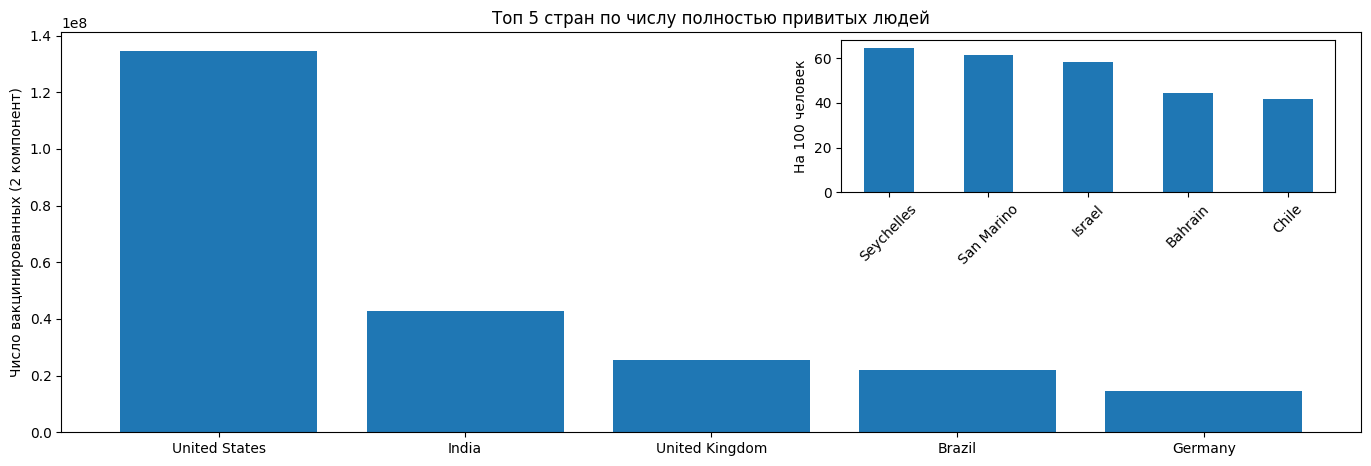

In [58]:
# Группируем таблицу по странам, находим последний по дате зафиксированный показатель с помощью метода last() и выбираем ТОП-5 стран с использованием метода nlargest().
# 
# При отображении графиков создаём две координатные плоскости main_axes и insert_axes, на каждой из них отдельно строим столбчатые диаграммы.

vacc_country = covid_df.groupby('country')['people_fully_vaccinated'].last().nlargest(5)
vacc_country_per_hundred = covid_df.groupby('country')['people_fully_vaccinated_per_hundred'].last().nlargest(5)

#визуализация главного графика
fig = plt.figure(figsize=(13, 4))
main_axes = fig.add_axes([0, 0, 1, 1])
main_axes.bar(x = vacc_country.index, height = vacc_country);
main_axes.set_ylabel('Число вакцинированных (2 компонент)')
main_axes.set_title('Топ 5 стран по числу полностью привитых людей')

#визуализация вспомогательного графика
insert_axes = fig.add_axes([0.6, 0.6, 0.38, 0.38])
insert_axes.bar(x = vacc_country_per_hundred.index, height = vacc_country_per_hundred, width=0.5);
insert_axes.set_ylabel('На 100 человек')
insert_axes.xaxis.set_tick_params(rotation=45)